In [30]:
import pandas as pd
import numpy as np

In [31]:
housing_data = pd.read_csv('HousingData.csv')

In [32]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [33]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [34]:
prices = housing_data['MEDV']
data = housing_data.drop(columns=['MEDV'],axis=1)
housing_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')
data = pd.DataFrame(impute.fit_transform(data))

In [36]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EED8620F48>,
      dtype=object)

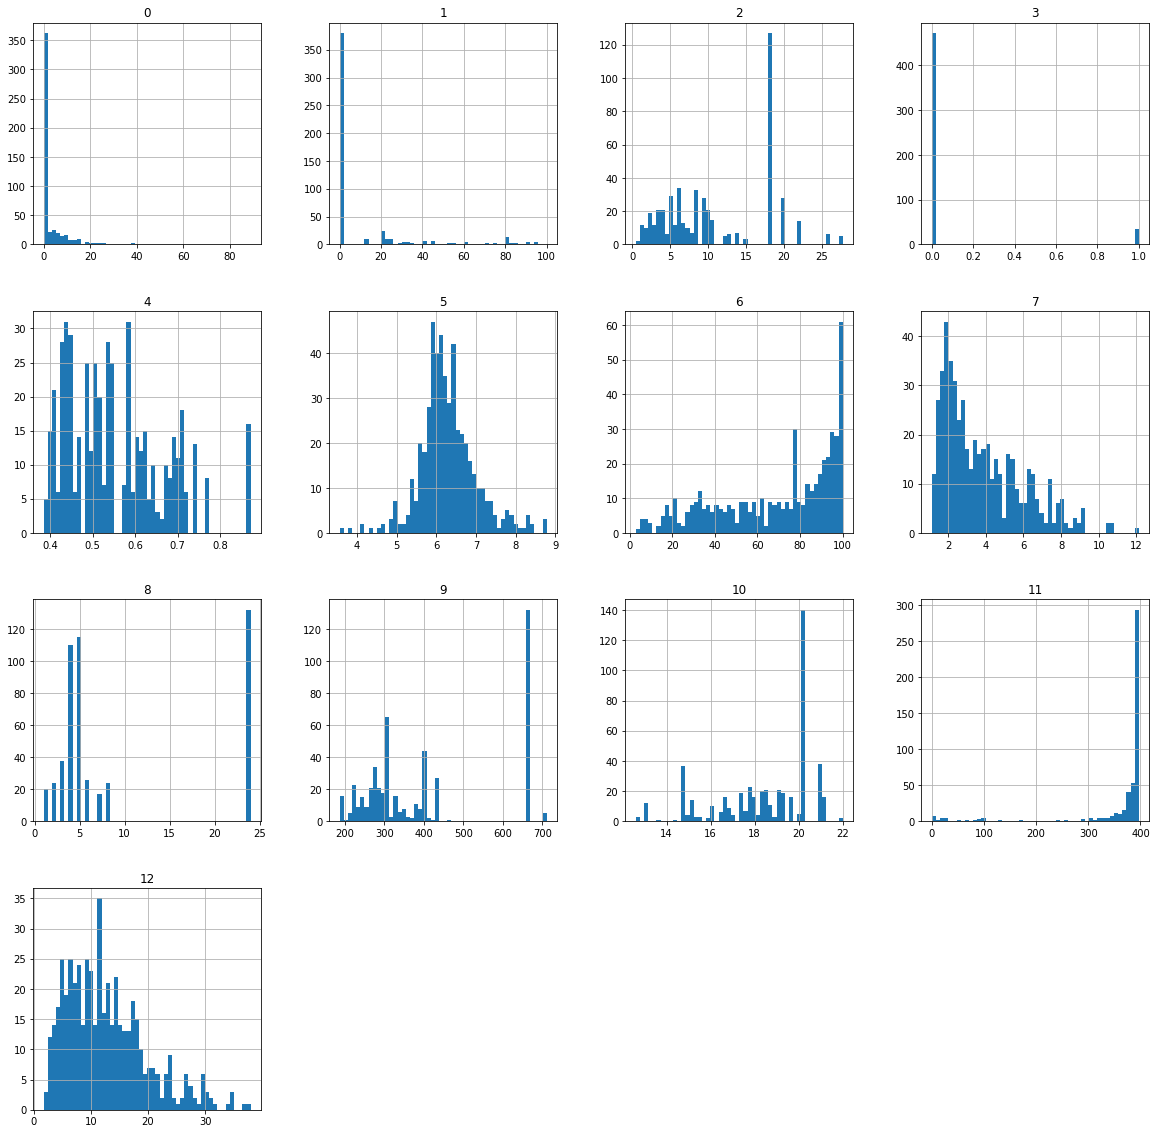

In [37]:
data.hist(bins=50,figsize=(20,20))

In [40]:
#THere is skewness in data 
from sklearn.preprocessing import QuantileTransformer
scale = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data = pd.DataFrame(scale.fit_transform(data))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EEDEC60948>,
      dtype=object)

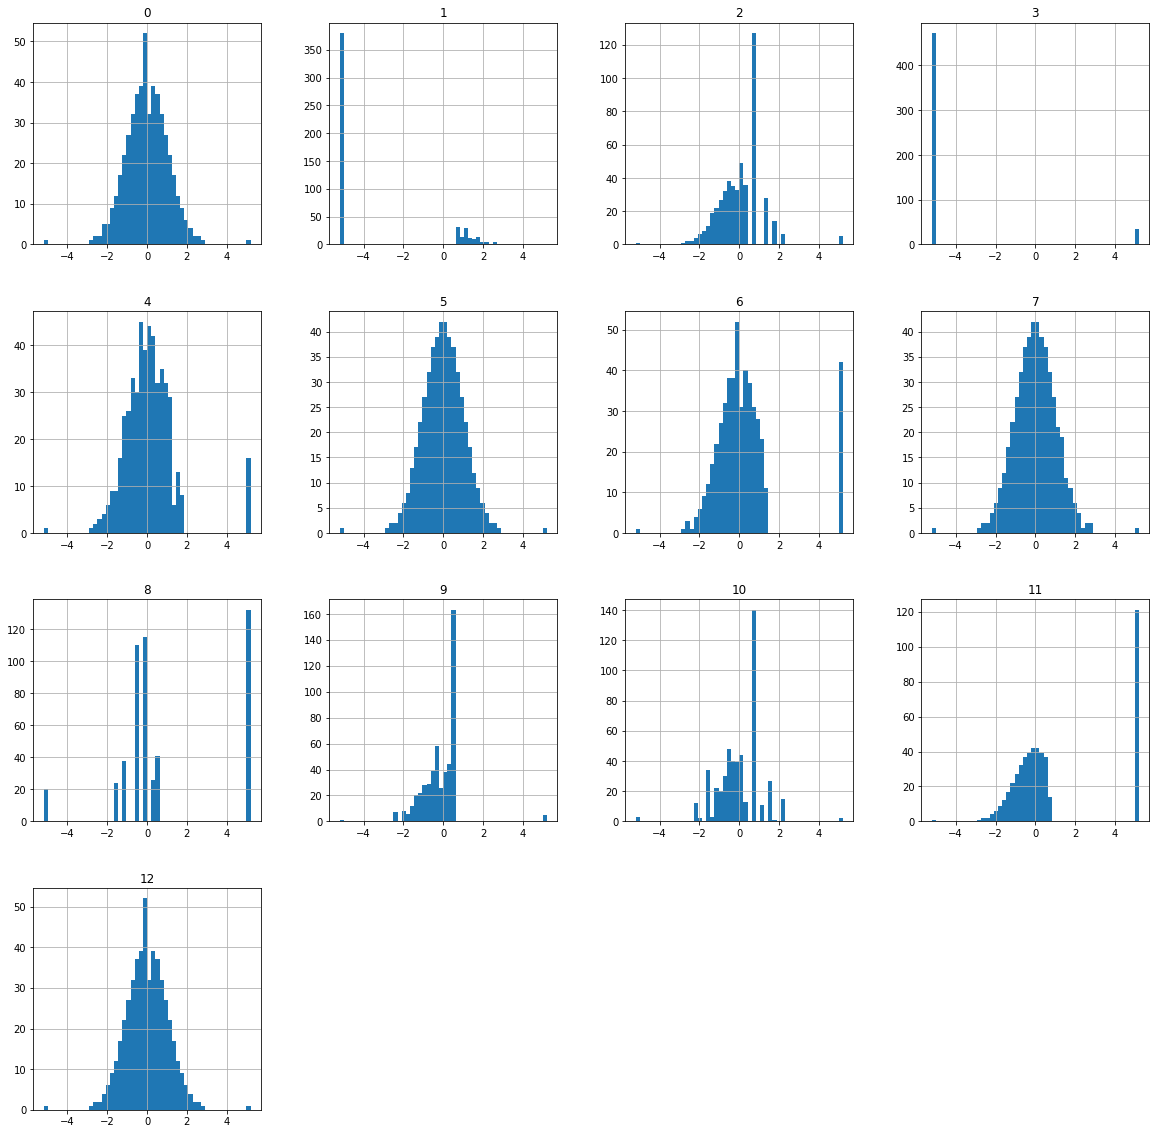

In [41]:
data.hist(bins=50,figsize=(20,20))

In [43]:
#Now data is in perfect normal distribution
print(prices.shape,data.shape)

(506,) (506, 13)


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,prices,random_state=0)

In [51]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(20,),activation='tanh',solver='adam', learning_rate='adaptive', max_iter=300)

In [52]:
model.fit(X_train,y_train)

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(activation='tanh', hidden_layer_sizes=(20,),
             learning_rate='adaptive', max_iter=300)

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("r2_score",r2_score(y_test,y_pred),'\n Mean Absolute Error',mean_absolute_error(y_test,y_pred),'\n Mean Squared Error',mean_squared_error(y_test,y_pred))

r2_score -0.8556230128869793 
 Mean Absolute Error 8.673309848250662 
 Mean Squared Error 151.60257317701866


In [55]:
model2 = MLPRegressor(hidden_layer_sizes=(20,40),activation='tanh',solver='adam', learning_rate='adaptive', max_iter=300)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("r2_score",r2_score(y_test,y_pred),'\n Mean Absolute Error',mean_absolute_error(y_test,y_pred),'\n Mean Squared Error',mean_squared_error(y_test,y_pred))

r2_score 0.060329523692797205 
 Mean Absolute Error 5.2857759169501035 
 Mean Squared Error 76.77015275048397


D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [59]:
model3 = MLPRegressor(hidden_layer_sizes=(20,40,60,80,160,320),activation='tanh',solver='adam', learning_rate='adaptive', max_iter=400)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
print("r2_score",r2_score(y_test,y_pred),'\n Mean Absolute Error',mean_absolute_error(y_test,y_pred),'\n Mean Squared Error',mean_squared_error(y_test,y_pred))

r2_score 0.7583934531286538 
 Mean Absolute Error 2.759687699998382 
 Mean Squared Error 19.739017002771444
